## Package import

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

## Read the SAPSCM.csv file from DeepSP

In [2]:
dataset_test = pd.read_csv('../data/example/SAPSCM.csv')
dataset_test

,Name,SAP_pos_CDRH1,SAP_pos_CDRH2,SAP_pos_CDRH3,SAP_pos_CDRL1,SAP_pos_CDRL2,SAP_pos_CDRL3,SAP_pos_CDR,SAP_pos_Hv,SAP_pos_Lv,...,SCM_pos_CDRH1,SCM_pos_CDRH2,SCM_pos_CDRH3,SCM_pos_CDRL1,SCM_pos_CDRL2,SCM_pos_CDRL3,SCM_pos_CDR,SCM_pos_Hv,SCM_pos_Lv,SCM_pos_Fv
0,abituzumab,3.86,4.35,8.72,2.15,4.70,6.79,30.68,45.53,36.43,...,33.36,50.21,58.55,37.38,99.53,19.15,301.27,877.35,1176.29,2044.64
1,abrilumab,3.42,1.08,1.83,2.09,2.40,6.01,17.93,43.01,31.23,...,3.42,-1.28,7.43,36.73,8.36,19.31,67.66,919.62,941.50,1849.14
2,adalimumab,2.13,2.52,14.45,1.90,3.59,3.17,27.50,58.42,30.52,...,3.18,19.58,29.51,116.77,41.76,55.55,263.84,907.11,1219.44,2109.09
3,alemtuzumab,2.27,3.70,5.04,2.22,2.76,3.33,20.66,52.66,32.29,...,31.13,109.97,113.78,59.37,59.35,156.55,539.40,1461.24,1302.77,2748.46
4,alirocumab,2.34,0.49,5.75,6.34,2.48,4.47,23.01,52.35,43.46,...,87.39,30.73,22.05,163.36,64.86,19.05,393.55,1270.47,966.63,2228.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,vedolizumab,2.81,0.27,11.76,5.93,2.96,2.82,27.31,51.97,51.45,...,30.37,-3.82,4.03,147.94,50.61,64.96,289.12,982.95,1155.90,2126.85
133,veltuzumab,2.51,4.15,14.46,3.16,4.07,2.54,31.23,43.67,37.64,...,34.90,0.02,39.57,32.31,35.55,30.64,166.97,1078.54,1059.89,2115.08
134,visilizumab,6.16,3.60,15.23,2.19,3.86,2.65,34.40,57.11,32.81,...,100.69,106.18,75.53,-2.44,69.55,18.26,372.93,1269.88,1078.14,2312.87
135,zalutumumab,1.99,5.14,18.61,0.97,2.46,5.58,34.69,63.19,32.75,...,29.38,5.33,43.21,1.04,2.67,29.45,108.28,1160.79,941.98,2081.37


## Features Selection and Transformation

In [3]:
feature_ACSINS = dataset_test[['SAP_pos_CDRH1', 'SAP_pos_CDRL3', 'SCM_pos_CDRH1','SCM_neg_CDR']]
feature_AS = dataset_test[['SAP_pos_CDRH2','SCM_pos_CDRL2','SCM_pos_CDRL3','SCM_neg_CDRL3']]
feature_BVP = dataset_test[['SAP_pos_CDRH1','SAP_pos_CDRH3','SCM_pos_CDR','SCM_neg_CDRH3']]
feature_CIC = dataset_test[['SAP_pos_CDRL2', 'SAP_pos_CDRL3', 'SAP_pos_Lv','SCM_neg_CDR']]
feature_CSI = dataset_test[['SAP_pos_CDRL1', 'SAP_pos_Lv', 'SCM_pos_CDRH2','SCM_neg_CDRL2']]
feature_ELISA = dataset_test[['SAP_pos_CDRH3', 'SCM_pos_CDR','SCM_neg_CDR']]
feature_HIC = dataset_test[['SAP_pos_CDRL3', 'SAP_pos_CDR','SAP_pos_Hv','SCM_pos_CDRH3']]
feature_HEK = dataset_test[['SAP_pos_CDRH2','SAP_pos_CDRL3','SCM_pos_Lv','SCM_neg_Lv']]
feature_PSR = dataset_test[['SAP_pos_Lv', 'SCM_pos_CDRH2', 'SCM_neg_CDRL2']]
feature_SGAC = dataset_test[['SAP_pos_CDRH1', 'SAP_pos_CDRL3', 'SCM_neg_CDRH2','SCM_neg_Lv']]
feature_SMAC = dataset_test[['SAP_pos_CDR', 'SAP_pos_Fv', 'SCM_neg_CDRL2','SCM_neg_Fv']]
feature_Tm = dataset_test[['SAP_pos_CDRH1', 'SAP_pos_CDRH2', 'SCM_pos_CDRH3']]


In [4]:
sc = StandardScaler()

X_ACSINS = feature_ACSINS.values
X_AS = feature_AS.values
X_BVP = feature_BVP.values
X_CIC = feature_CIC.values
X_CSI = feature_CSI.values
X_ELISA = feature_ELISA.values
X_HIC = feature_HIC.values
X_HEK = feature_HEK.values
X_PSR = feature_PSR.values
X_SGAC = feature_SGAC.values
X_SMAC = feature_SMAC.values
X_Tm = feature_Tm.values

X_ACSINS = sc.fit_transform(X_ACSINS)
X_AS = sc.fit_transform(X_AS)
X_BVP = sc.fit_transform(X_BVP)
X_CIC = sc.fit_transform(X_CIC)
X_CSI = sc.fit_transform(X_CSI)
X_ELISA = sc.fit_transform(X_ELISA)
X_HIC = sc.fit_transform(X_HIC)
X_HEK = sc.fit_transform(X_HEK)
X_PSR = sc.fit_transform(X_PSR)
X_SGAC = sc.fit_transform(X_SGAC)
X_SMAC = sc.fit_transform(X_SMAC)
X_Tm = sc.fit_transform(X_Tm)

## Predictive Model Import 

In [5]:
ACSINS_SVR_model = joblib.load('../models/Trained_model/ACSINS_SVR_model.joblib')
AS_LR_model = joblib.load('../models/Trained_model/AS_LR_model.joblib')
BVP_KNN_model = joblib.load('../models/Trained_model/BVP_KNN_model.joblib')
CIC_KNN_model = joblib.load('../models/Trained_model/CIC_KNN_model.joblib')
CSI_SVR_model = joblib.load('../models/Trained_model/CSI_SVR_model.joblib')
ELISA_KNN_model = joblib.load('../models/Trained_model/ELISA_KNN_model.joblib')
HEK_KNN_model = joblib.load('../models/Trained_model/HEK_KNN_model.joblib')
HIC_SVR_model = joblib.load('../models/Trained_model/HIC_SVR_model.joblib')
PSR_SVR_model = joblib.load('../models/Trained_model/PSR_SVR_model.joblib')
SGAC_SVR_model = joblib.load('../models/Trained_model/SGAC_SVR_model.joblib')
SMAC_KNN_model = joblib.load('../models/Trained_model/SMAC_KNN_model.joblib')
Tm_KNN_model = joblib.load('../models/Trained_model/Tm_KNN_model.joblib')

/mnt/c4a1c56d-0589-48cd-9717-f6c33a86fa3b/Tools/AbDev/.pixi/envs/default/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SVR from version 1.3.0 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c4a1c56d-0589-48cd-9717-f6c33a86fa3b/Tools/AbDev/.pixi/envs/default/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.0 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c4a1c56d-0589-48cd-9717-f6c33a86fa3b/Tools/AbDev/.pixi/envs/default/lib/python3.12/site-packag

## Biophysical Properties Prediction

In [6]:
# 모든 예측을 한 번에 수행
ACSINS_transformed = ACSINS_SVR_model.predict(X_ACSINS)
AS = AS_LR_model.predict(X_AS)
BVP = BVP_KNN_model.predict(X_BVP)
CIC_transformed = CIC_KNN_model.predict(X_CIC)
CSI_transformed = CSI_SVR_model.predict(X_CSI)
ELISA = ELISA_KNN_model.predict(X_ELISA)
HIC = HIC_SVR_model.predict(X_HIC)
HEK = HEK_KNN_model.predict(X_HEK)
PSR = PSR_SVR_model.predict(X_PSR)
SGAC_transformed = SGAC_SVR_model.predict(X_SGAC)
SMAC_transformed = SMAC_KNN_model.predict(X_SMAC)
Tm = Tm_KNN_model.predict(X_Tm)


## Result Sheet Generation

In [7]:
Name = dataset_test[['Name']].to_numpy()

In [8]:
data = np.column_stack((Name,ACSINS_transformed,AS,BVP,CIC_transformed,CSI_transformed,ELISA,HIC,HEK,PSR,SGAC_transformed,SMAC_transformed,Tm))

np.savetxt('../data/example/Prediction_Result.csv', data, delimiter=',', fmt='%s', header='Name,ACSINS_transformed,AS,BVP,CIC_transformed,CSI_transformed,ELISA,HIC,HEK,PSR,SGAC_transformed,SMAC_transformed,Tm', comments='')


In [9]:
Result = pd.read_csv('../data/example/Prediction_Result.csv')
Result

,Name,ACSINS_transformed,AS,BVP,CIC_transformed,CSI_transformed,ELISA,HIC,HEK,PSR,SGAC_transformed,SMAC_transformed,Tm
0,abituzumab,0.130325,0.061883,2.241486,-0.400373,0.754452,1.246774,9.611033,110.547472,0.213440,0.092682,-0.609231,74.083333
1,abrilumab,-1.699516,0.031335,1.514032,-1.301207,-0.567603,1.098520,9.174332,133.475483,0.094551,0.499488,-0.764255,76.166667
2,adalimumab,-0.108982,0.051017,1.923480,0.448578,0.009078,1.106229,9.404225,115.630949,0.077331,0.318433,-0.461127,72.333333
3,alemtuzumab,0.434834,0.080613,4.494636,-0.161054,0.573666,2.792832,9.472621,150.744013,0.372855,0.576464,-0.930367,67.500000
4,alirocumab,0.131522,0.047069,2.811663,-0.145515,-0.169576,1.150019,9.536504,120.915541,0.130635,0.312652,0.007217,75.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,vedolizumab,-0.444506,0.053190,2.944426,-0.167349,-0.427118,1.204125,10.594875,156.937085,0.054911,0.375138,0.504680,74.416667
133,veltuzumab,0.607031,0.045691,1.557630,0.179597,-0.476580,1.065002,11.166740,183.962341,0.097123,0.371713,0.036602,69.750000
134,visilizumab,0.910397,0.052150,3.735838,0.133477,0.497673,1.580209,9.837876,200.977743,0.298071,-0.624847,-0.285582,69.916667
135,zalutumumab,-1.681399,0.036892,3.967388,-2.098217,-0.704742,1.155225,9.712947,175.954421,0.085330,0.605281,-0.168116,72.083333


In [10]:
Result.shape

(137, 13)

# 시각화

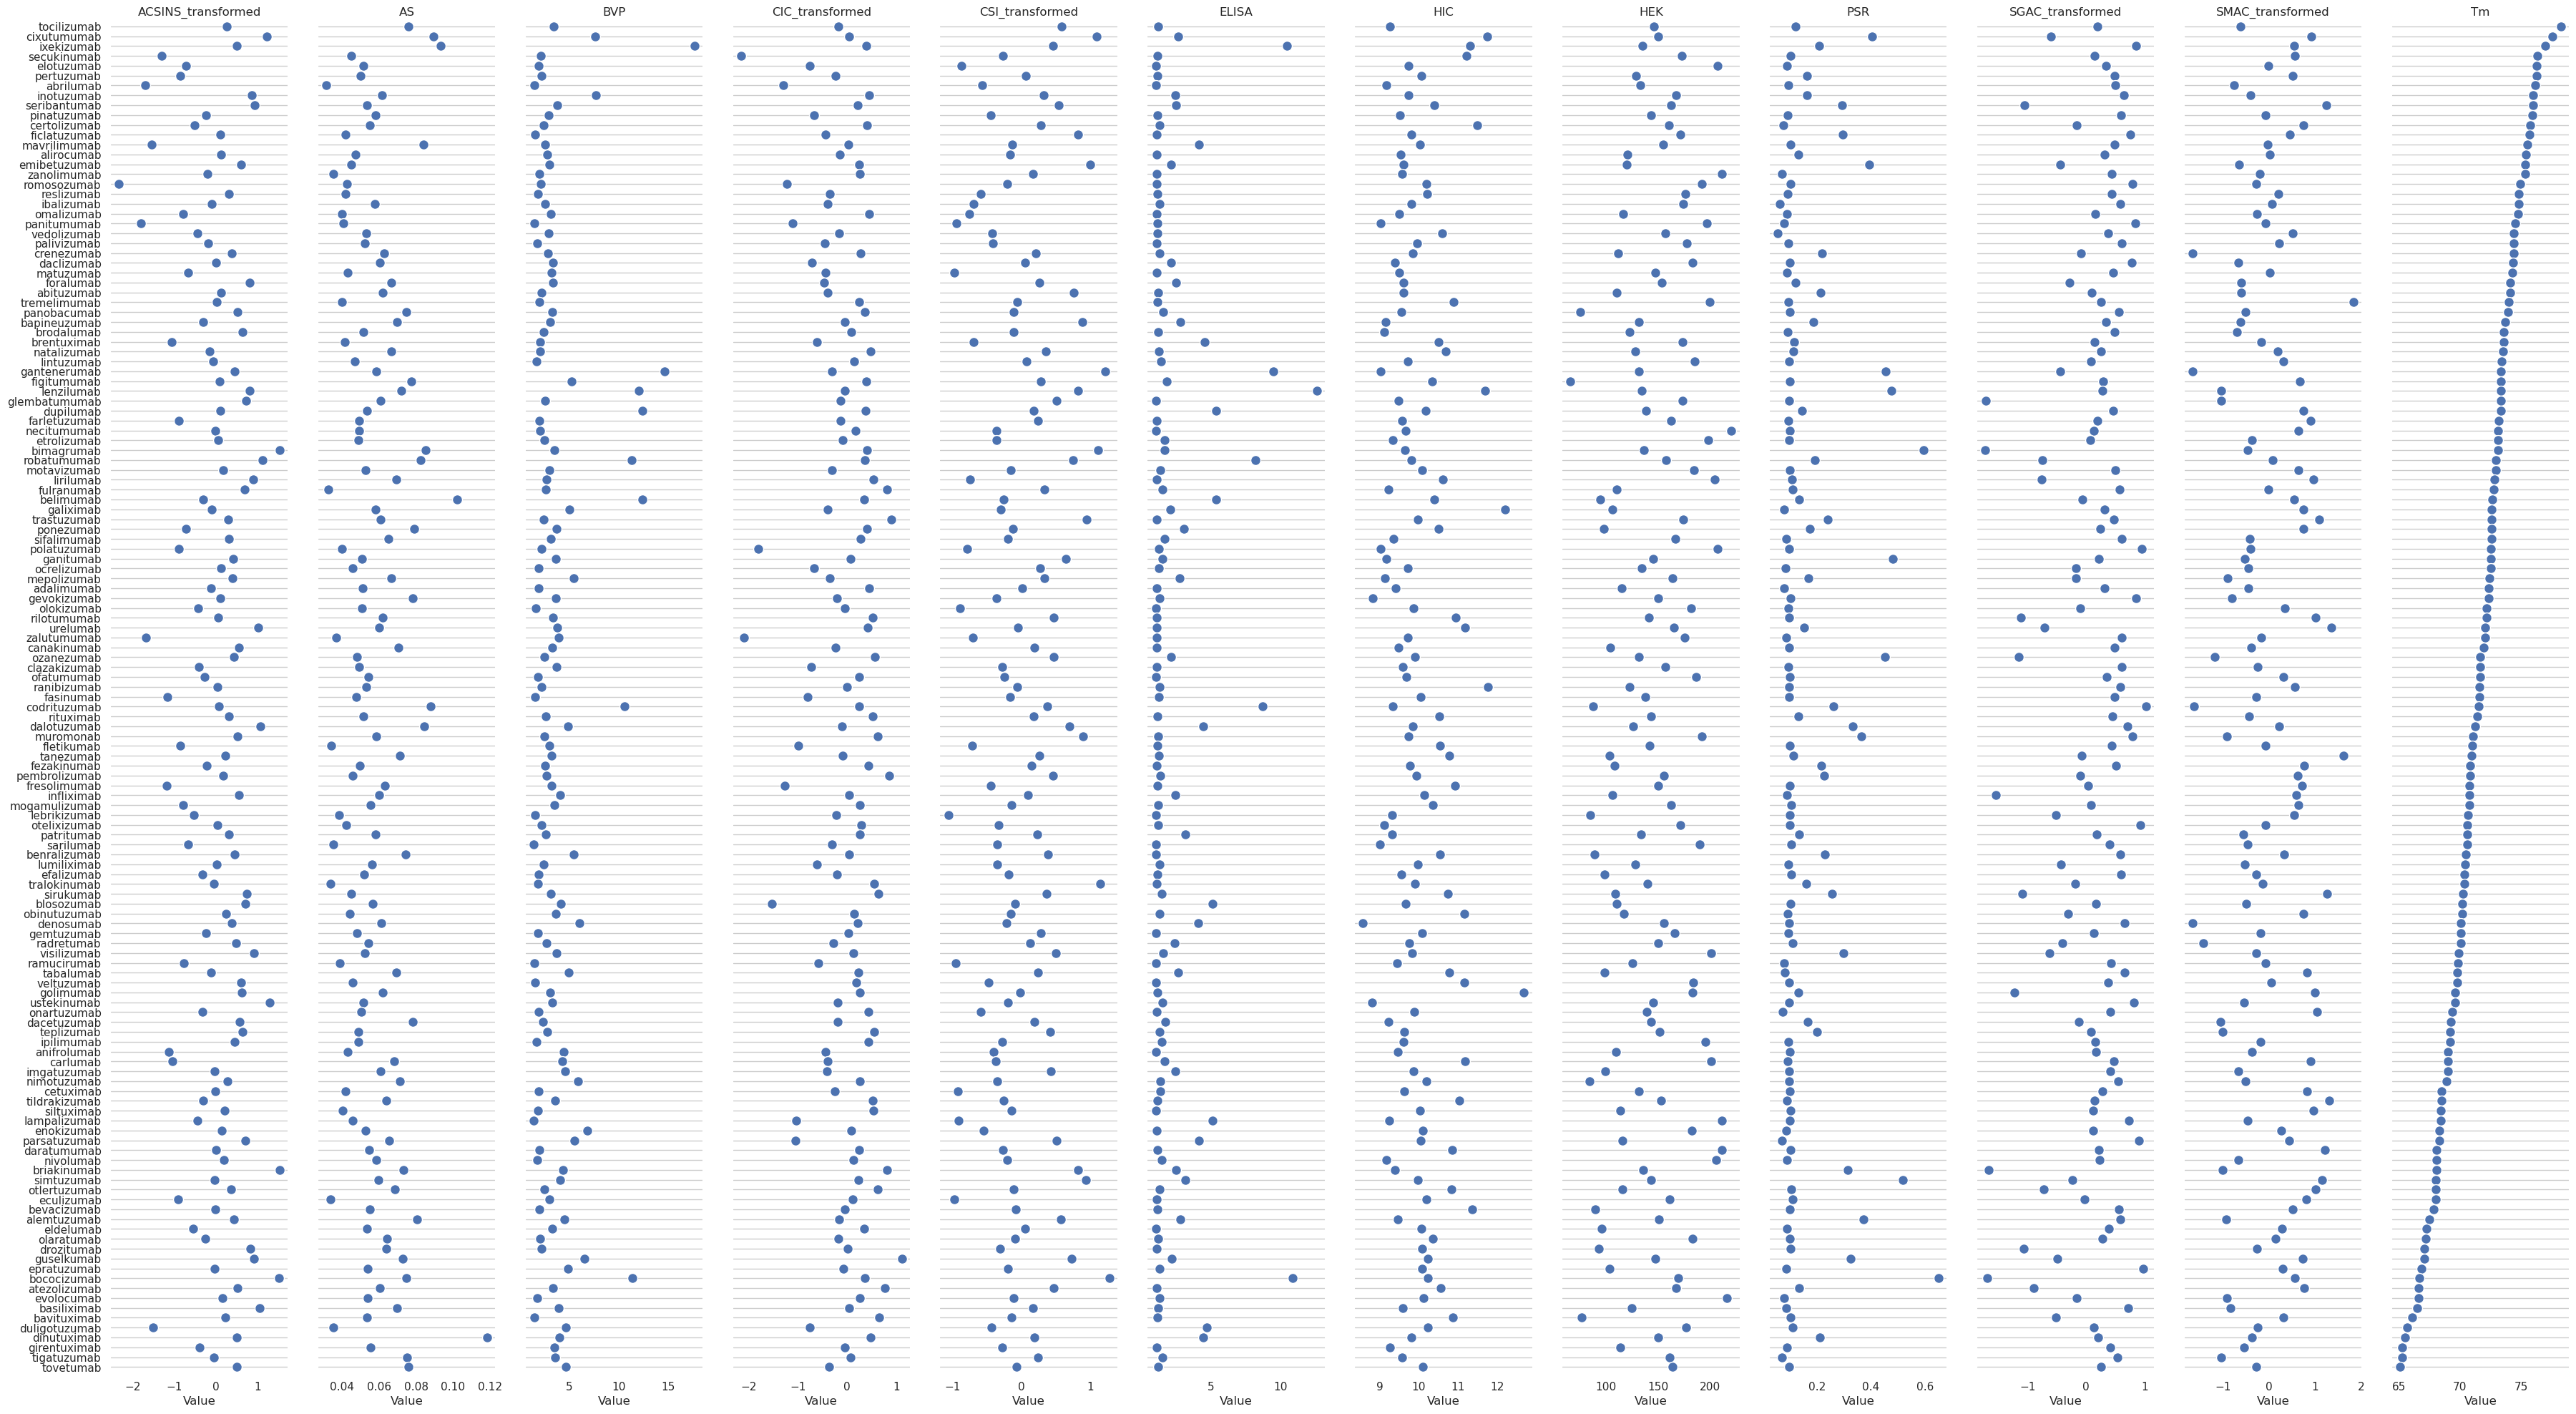

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = Result

# Seaborn 테마 설정
sns.set_theme(style="whitegrid")

# 2. PairGrid를 생성합니다.
# x_vars: 그래프의 열(x축)이 될 변수들 (모든 수치형 특성)
# y_vars: 그래프의 행(y축)이 될 변수 ('Name')
x_vars = df.columns.drop('Name').tolist()

g = sns.PairGrid(df.sort_values("Tm", ascending=False), # 'Tm' 값을 기준으로 정렬
                 x_vars=x_vars,
                 y_vars=["Name"],
                 height=20, aspect=.15)

# 3. stripplot(dot plot)을 그립니다.
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# 4. 공통 X축 레이블과 Y축 레이블을 설정합니다.
g.set(xlabel="Value", ylabel="")

# 5. 각 subplot에 해당 변수명을 제목으로 설정합니다.
for ax, title in zip(g.axes.flat, x_vars):
    # 각 축(subplot)에 제목 설정
    ax.set(title=title)
    # 세로 그리드는 없애고 가로 그리드만 표시
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

# 6. 불필요한 축 테두리를 제거하여 깔끔하게 만듭니다.
sns.despine(left=True, bottom=True)

# 7. 그래프를 화면에 표시하고 이미지 파일로 저장합니다.
plt.show()

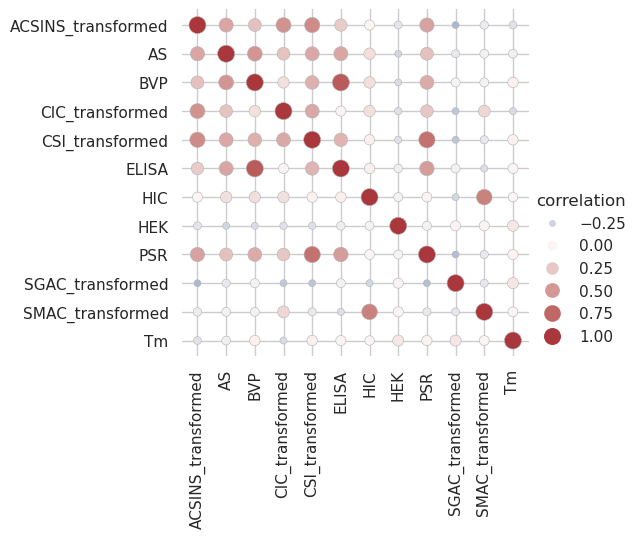

In [12]:
# 2. 상관관계 행렬 계산 시 숫자형 데이터만 사용하도록 수정합니다.
corr_mat = df.corr(numeric_only=True).stack().reset_index(name="correlation")

# 3. 각 셀을 크기와 색상이 다른 산점도로 그립니다.
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=6, sizes=(25, 150), size_norm=(-.2, .8),
)

# 4. 그림을 최종적으로 다듬습니다.
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

# 5. 그래프를 저장하고 화면에 표시합니다.
plt.show()